<image src="img/Tesoro de denarios romanos de Torre de Juan Abad (Jaén).jpg" width="800" height="600">

Tesoro de denarios romanos de Torre de Juan Abad (Jaén)- MAN

# **CLASIFICADOR DE MONEDAS ANTIGUAS.**

## ÍNDICE
1. [IMPORTAR LOS DATASET](#1-importar-los-dataset)  
2. [UNIFICACIÓN DE DATASET](#2-unificacion-de-dataset)  
3. [PREPROCESAMIENTO DE LOS DATOS](#3-preprocesamiento-de-los-datos)  
   3.1. [Distribución de las diferentes columnas](#31-distribucion-de-las-diferentes-columnas)  
   3.2. [Comprobar duplicados](#32-comprobar-duplicados)  
   3.3. [Eliminar columnas innecesarias](#33-eliminar-columnas-innecesarias)  
   3.4. [Balancear el dataset](#34-balancear-el-dataset)  
   3.5. [Reordenar las columnas por orden de usabilidad](#35-reordenar-las-columnas-por-orden-de-usabilidad)  
   3.6. [Convertir columnas categóricas a numéricas](#36-convertir-columnas-categoricas-a-numericas)  
   3.7. [Tratamiento de los nulos](#37-tratamiento-de-los-nulos)  
   3.8. [Guardar el dataframe preparado para los modelos](#38-guardar-el-dataframe-preparado-para-los-modelos)
4. [GUARDAR LAS FOTOS DEL DATAFRAME EN UNA CARPETA LOCAL](#4-guardar-las-fotos-del-dataframe-en-una-carpeta-local)  

## 1. IMPORTAR LOS DATASET.

In [ ]:
'''IMPORTAR LIBRERÍAS.'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
'''Importar el dataset creado con los resultados del webscrapping.'''

df_webscrap = pd.read_csv('../data/raw/Resultados_Webscrapping.csv')
df_webscrap

,URL,Unique ID,Primary material,Manufacture method,Image URL,Saved Image
0,https://finds.org.uk/database/artefacts/record...,BH-638D06,Silver,Struck or hammered,https://finds.org.uk/images/mfittock/medium/BH...,Fotos_monedas\BH-638D06.jpg
1,https://finds.org.uk/database/artefacts/record...,BH-4EEEC1,Copper alloy,Struck or hammered,https://finds.org.uk/images/mfittock/medium/BH...,Fotos_monedas\BH-4EEEC1.jpg
2,https://finds.org.uk/database/artefacts/record...,PUBLIC-E97499,Copper alloy,Struck or hammered,https://finds.org.uk/images/strebor/medium/PUB...,Fotos_monedas\PUBLIC-E97499.jpg
3,https://finds.org.uk/database/artefacts/record...,PUBLIC-C94E4B,Copper alloy,Struck or hammered,https://finds.org.uk/images/strebor/medium/PUB...,Fotos_monedas\PUBLIC-C94E4B.jpg
4,https://finds.org.uk/database/artefacts/record...,BH-7A498C,Copper alloy,Struck or hammered,https://finds.org.uk/images/sashamarie/medium/...,Fotos_monedas\BH-7A498C.jpg
...,...,...,...,...,...,...
9237,https://finds.org.uk/database/artefacts/record...,NLM1288,Copper alloy,NaN,https://finds.org.uk/images/kadams/medium/nlm1...,Fotos_monedas\NLM1288.jpg
9238,https://finds.org.uk/database/artefacts/record...,LVPL427,Silver,NaN,https://finds.org.uk/images/nherepath/medium/l...,Fotos_monedas\LVPL427.jpg
9239,https://finds.org.uk/database/artefacts/record...,LVPL410,Silver,NaN,https://finds.org.uk/images/nherepath/medium/l...,Fotos_monedas\LVPL410.jpg
9240,https://finds.org.uk/database/artefacts/record...,KENT453,Silver,Struck or hammered,https://finds.org.uk/images/arichardson/medium...,Fotos_monedas\KENT453.jpg


In [3]:
df_webscrap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9242 entries, 0 to 9241
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   URL                 9242 non-null   object
 1   Unique ID           9241 non-null   object
 2   Primary material    9219 non-null   object
 3   Manufacture method  8204 non-null   object
 4   Image URL           9241 non-null   object
 5   Saved Image         9208 non-null   object
dtypes: object(6)
memory usage: 433.3+ KB


In [4]:
'''Importar el dataset descargados en Kaggle.'''

df_original = pd.read_csv('../data/processed/df_2.csv')
df_original

C:\Users\admin\AppData\Local\Temp\ipykernel_13540\1177708213.py:3: DtypeWarning: Columns (26,29,35,39,41,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('../data/processed/df_2.csv')


,id,uri,old_findID,secuid,objecttype,objectCertainty,classification,subClassification,length,height,...,thumbnail,imagedir,filename,finder,discoveryMethod,creator,institution,created,updated,period
0,994993,https://finds.org.uk/database/artefacts/record...,BH-638D06,PAS5E5638D00015F4,COIN,NaN,NaN,NaN,NaN,NaN,...,1095123,images/mfittock/,BH638D06.jpg,Restricted info,Metal detector,Matthew Fittock,BH,2020-02-26T09:22:24Z,2020-03-21T12:50:01Z,6
1,994706,https://finds.org.uk/database/artefacts/record...,BH-4EEEC1,PAS5E54EEEC001164,COIN,NaN,NaN,NaN,NaN,NaN,...,1095036,images/mfittock/,BH4EEEC1.jpg,Restricted info,Metal detector,Matthew Fittock,BH,2020-02-25T09:54:52Z,2020-03-21T12:54:45Z,6
2,994180,https://finds.org.uk/database/artefacts/record...,PUBLIC-E97499,PAS5E4E974900190B,COIN,NaN,NaN,NaN,NaN,NaN,...,1093529,images/strebor/,PUBLICE97499RomannummusConstantineIIAD31740BEA...,Restricted info,Metal detector,David Roberts,PUBLIC,2020-02-20T14:27:21Z,2020-02-21T11:58:42Z,6
3,987795,https://finds.org.uk/database/artefacts/record...,PUBLIC-C94E4B,PAS5E1C94E4001BA1,COIN,NaN,NaN,NaN,NaN,NaN,...,1087745,images/strebor/,PUBLICC94E4BRomanradiateGallienvsAPOLLINICONSA...,Restricted info,Metal detector,David Roberts,PUBLIC,2020-01-13T16:03:48Z,2020-01-13T16:31:01Z,6
4,983783,https://finds.org.uk/database/artefacts/record...,BH-7A498C,PAS5DE7A498001C96,COIN,NaN,NaN,NaN,NaN,NaN,...,1084465,images/sashamarie/,BH7A98C.jpg,Restricted info,Metal detector,Alexandra Cobby,BH,2019-12-04T12:20:40Z,2019-12-13T14:10:31Z,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9237,9095,https://finds.org.uk/database/artefacts/record...,NLM1288,0013EA16122013B2,COIN,Certain,NaN,NaN,NaN,NaN,...,1515,images/melwes/,nlm1288.jpg,Restricted info,Metal detector,Marina Elwes,NLM,1999-02-25T00:00:00Z,2011-02-24T13:15:37Z,5
9238,6719,https://finds.org.uk/database/artefacts/record...,LVPL427,0013EA1612101A68,COIN,Certain,NaN,NaN,NaN,NaN,...,941,images/nherepath/,lvpl427.jpg,Restricted info,Metal detector,Nick Herepath,LVPL,1998-11-11T00:00:00Z,2011-02-24T13:14:58Z,5
9239,6701,https://finds.org.uk/database/artefacts/record...,LVPL410,0013EA1612101A56,COIN,Certain,NaN,NaN,NaN,NaN,...,938,images/nherepath/,lvpl410.jpg,Restricted info,Metal detector,Nick Herepath,LVPL,1998-11-05T00:00:00Z,2011-02-24T13:14:58Z,5
9240,4864,https://finds.org.uk/database/artefacts/record...,KENT453,0013EA161210131E,COIN,Certain,NaN,NaN,NaN,NaN,...,532,images/rhobbs/,kent453a.jpg,Restricted info,Metal detector,Richard Hobbs,KENT,1998-09-03T00:00:00Z,2015-01-13T15:27:57Z,5


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9242 entries, 0 to 9241
Data columns (total 70 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9242 non-null   int64  
 1   uri                   9242 non-null   object 
 2   old_findID            9242 non-null   object 
 3   secuid                9242 non-null   object 
 4   objecttype            9242 non-null   object 
 5   objectCertainty       8019 non-null   object 
 6   classification        651 non-null    object 
 7   subClassification     127 non-null    object 
 8   length                378 non-null    float64
 9   height                5 non-null      float64
 10  width                 370 non-null    float64
 11  thickness             3375 non-null   float64
 12  diameter              7770 non-null   float64
 13  weight                8337 non-null   float64
 14  quantity              9242 non-null   int64  
 15  otherRef             

## 2. UNIFICAR LOS DATAFRAME.

In [6]:
'''Unificar los dos dataframe a tráves de un merge'''

# Cambiar el nombre de la columna del df_original a Unique ID.

df_original.rename(columns={'old_findID' : 'Unique ID'}, inplace= True)
df_original

,id,uri,Unique ID,secuid,objecttype,objectCertainty,classification,subClassification,length,height,...,thumbnail,imagedir,filename,finder,discoveryMethod,creator,institution,created,updated,period
0,994993,https://finds.org.uk/database/artefacts/record...,BH-638D06,PAS5E5638D00015F4,COIN,NaN,NaN,NaN,NaN,NaN,...,1095123,images/mfittock/,BH638D06.jpg,Restricted info,Metal detector,Matthew Fittock,BH,2020-02-26T09:22:24Z,2020-03-21T12:50:01Z,6
1,994706,https://finds.org.uk/database/artefacts/record...,BH-4EEEC1,PAS5E54EEEC001164,COIN,NaN,NaN,NaN,NaN,NaN,...,1095036,images/mfittock/,BH4EEEC1.jpg,Restricted info,Metal detector,Matthew Fittock,BH,2020-02-25T09:54:52Z,2020-03-21T12:54:45Z,6
2,994180,https://finds.org.uk/database/artefacts/record...,PUBLIC-E97499,PAS5E4E974900190B,COIN,NaN,NaN,NaN,NaN,NaN,...,1093529,images/strebor/,PUBLICE97499RomannummusConstantineIIAD31740BEA...,Restricted info,Metal detector,David Roberts,PUBLIC,2020-02-20T14:27:21Z,2020-02-21T11:58:42Z,6
3,987795,https://finds.org.uk/database/artefacts/record...,PUBLIC-C94E4B,PAS5E1C94E4001BA1,COIN,NaN,NaN,NaN,NaN,NaN,...,1087745,images/strebor/,PUBLICC94E4BRomanradiateGallienvsAPOLLINICONSA...,Restricted info,Metal detector,David Roberts,PUBLIC,2020-01-13T16:03:48Z,2020-01-13T16:31:01Z,6
4,983783,https://finds.org.uk/database/artefacts/record...,BH-7A498C,PAS5DE7A498001C96,COIN,NaN,NaN,NaN,NaN,NaN,...,1084465,images/sashamarie/,BH7A98C.jpg,Restricted info,Metal detector,Alexandra Cobby,BH,2019-12-04T12:20:40Z,2019-12-13T14:10:31Z,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9237,9095,https://finds.org.uk/database/artefacts/record...,NLM1288,0013EA16122013B2,COIN,Certain,NaN,NaN,NaN,NaN,...,1515,images/melwes/,nlm1288.jpg,Restricted info,Metal detector,Marina Elwes,NLM,1999-02-25T00:00:00Z,2011-02-24T13:15:37Z,5
9238,6719,https://finds.org.uk/database/artefacts/record...,LVPL427,0013EA1612101A68,COIN,Certain,NaN,NaN,NaN,NaN,...,941,images/nherepath/,lvpl427.jpg,Restricted info,Metal detector,Nick Herepath,LVPL,1998-11-11T00:00:00Z,2011-02-24T13:14:58Z,5
9239,6701,https://finds.org.uk/database/artefacts/record...,LVPL410,0013EA1612101A56,COIN,Certain,NaN,NaN,NaN,NaN,...,938,images/nherepath/,lvpl410.jpg,Restricted info,Metal detector,Nick Herepath,LVPL,1998-11-05T00:00:00Z,2011-02-24T13:14:58Z,5
9240,4864,https://finds.org.uk/database/artefacts/record...,KENT453,0013EA161210131E,COIN,Certain,NaN,NaN,NaN,NaN,...,532,images/rhobbs/,kent453a.jpg,Restricted info,Metal detector,Richard Hobbs,KENT,1998-09-03T00:00:00Z,2015-01-13T15:27:57Z,5


In [7]:
# Unir df_original y df_webscrap usando la columna 'Unique ID'

df_final = pd.merge(df_original, df_webscrap, on='Unique ID', how='inner')
df_final

,id,uri,Unique ID,secuid,objecttype,objectCertainty,classification,subClassification,length,height,...,creator,institution,created,updated,period,URL,Primary material,Manufacture method,Image URL,Saved Image
0,994993,https://finds.org.uk/database/artefacts/record...,BH-638D06,PAS5E5638D00015F4,COIN,NaN,NaN,NaN,NaN,NaN,...,Matthew Fittock,BH,2020-02-26T09:22:24Z,2020-03-21T12:50:01Z,6,https://finds.org.uk/database/artefacts/record...,Silver,Struck or hammered,https://finds.org.uk/images/mfittock/medium/BH...,Fotos_monedas\BH-638D06.jpg
1,994706,https://finds.org.uk/database/artefacts/record...,BH-4EEEC1,PAS5E54EEEC001164,COIN,NaN,NaN,NaN,NaN,NaN,...,Matthew Fittock,BH,2020-02-25T09:54:52Z,2020-03-21T12:54:45Z,6,https://finds.org.uk/database/artefacts/record...,Copper alloy,Struck or hammered,https://finds.org.uk/images/mfittock/medium/BH...,Fotos_monedas\BH-4EEEC1.jpg
2,994180,https://finds.org.uk/database/artefacts/record...,PUBLIC-E97499,PAS5E4E974900190B,COIN,NaN,NaN,NaN,NaN,NaN,...,David Roberts,PUBLIC,2020-02-20T14:27:21Z,2020-02-21T11:58:42Z,6,https://finds.org.uk/database/artefacts/record...,Copper alloy,Struck or hammered,https://finds.org.uk/images/strebor/medium/PUB...,Fotos_monedas\PUBLIC-E97499.jpg
3,987795,https://finds.org.uk/database/artefacts/record...,PUBLIC-C94E4B,PAS5E1C94E4001BA1,COIN,NaN,NaN,NaN,NaN,NaN,...,David Roberts,PUBLIC,2020-01-13T16:03:48Z,2020-01-13T16:31:01Z,6,https://finds.org.uk/database/artefacts/record...,Copper alloy,Struck or hammered,https://finds.org.uk/images/strebor/medium/PUB...,Fotos_monedas\PUBLIC-C94E4B.jpg
4,983783,https://finds.org.uk/database/artefacts/record...,BH-7A498C,PAS5DE7A498001C96,COIN,NaN,NaN,NaN,NaN,NaN,...,Alexandra Cobby,BH,2019-12-04T12:20:40Z,2019-12-13T14:10:31Z,5,https://finds.org.uk/database/artefacts/record...,Copper alloy,Struck or hammered,https://finds.org.uk/images/sashamarie/medium/...,Fotos_monedas\BH-7A498C.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9236,9095,https://finds.org.uk/database/artefacts/record...,NLM1288,0013EA16122013B2,COIN,Certain,NaN,NaN,NaN,NaN,...,Marina Elwes,NLM,1999-02-25T00:00:00Z,2011-02-24T13:15:37Z,5,https://finds.org.uk/database/artefacts/record...,Copper alloy,NaN,https://finds.org.uk/images/kadams/medium/nlm1...,Fotos_monedas\NLM1288.jpg
9237,6719,https://finds.org.uk/database/artefacts/record...,LVPL427,0013EA1612101A68,COIN,Certain,NaN,NaN,NaN,NaN,...,Nick Herepath,LVPL,1998-11-11T00:00:00Z,2011-02-24T13:14:58Z,5,https://finds.org.uk/database/artefacts/record...,Silver,NaN,https://finds.org.uk/images/nherepath/medium/l...,Fotos_monedas\LVPL427.jpg
9238,6701,https://finds.org.uk/database/artefacts/record...,LVPL410,0013EA1612101A56,COIN,Certain,NaN,NaN,NaN,NaN,...,Nick Herepath,LVPL,1998-11-05T00:00:00Z,2011-02-24T13:14:58Z,5,https://finds.org.uk/database/artefacts/record...,Silver,NaN,https://finds.org.uk/images/nherepath/medium/l...,Fotos_monedas\LVPL410.jpg
9239,4864,https://finds.org.uk/database/artefacts/record...,KENT453,0013EA161210131E,COIN,Certain,NaN,NaN,NaN,NaN,...,Richard Hobbs,KENT,1998-09-03T00:00:00Z,2015-01-13T15:27:57Z,5,https://finds.org.uk/database/artefacts/record...,Silver,Struck or hammered,https://finds.org.uk/images/arichardson/medium...,Fotos_monedas\KENT453.jpg


## 3. Preprocesamiento de datos.

### 3.1. Distribución de las diferentes columnas.

#### Columna broadperiod.

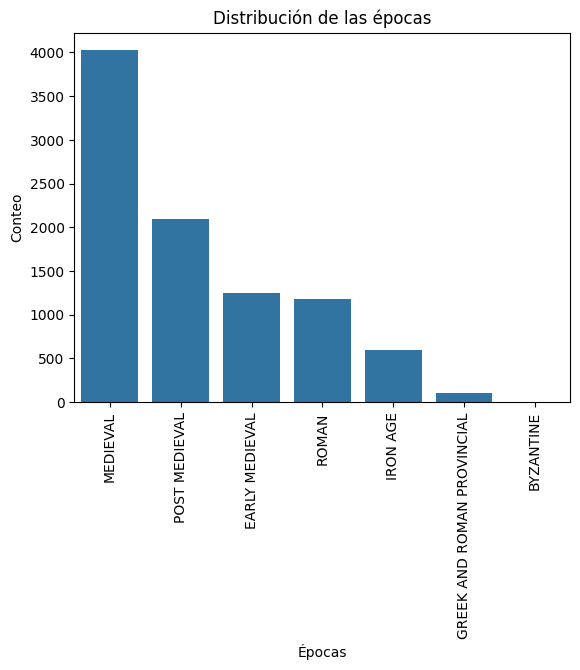

In [8]:
'''Visualizar las diferentes épocas.'''

sns.barplot(x=df_final['broadperiod'].value_counts().index, 
            y=df_final['broadperiod'].value_counts().values);
plt.xlabel('Épocas');
plt.ylabel('Conteo');
plt.title('Distribución de las épocas');
plt.xticks(rotation=90);

In [9]:
'''Observamos un solo registro de época bizantina.'''

df_final[df_final['broadperiod'] == 'BYZANTINE']

,id,uri,Unique ID,secuid,objecttype,objectCertainty,classification,subClassification,length,height,...,creator,institution,created,updated,period,URL,Primary material,Manufacture method,Image URL,Saved Image
767,501651,https://finds.org.uk/database/artefacts/record...,BH-3F1BA7,PAS4FA3F1BA001DC4,COIN,Certain,NaN,NaN,NaN,NaN,...,Julian Watters,BH,2012-05-04T16:11:55Z,2012-05-04T16:27:00Z,0,https://finds.org.uk/database/artefacts/record...,Copper alloy,Struck or hammered,https://finds.org.uk/images/jwatters/medium/Ea...,Fotos_monedas\BH-3F1BA7.jpg


In [10]:
#  Al existir solo un registro, procedo a eliminarlo, ya que no es representativo.

df_final = df_final.drop(df_final[df_final['broadperiod'] == 'BYZANTINE'].index)

In [11]:
'''Unificar las monedas romanas en un periodo romano, aunque su procedencia sea provincial, ya que nuestro proyecto consiste
en su clasificación según la época y no procedencia.'''

df_final['broadperiod'] = df_final[ 'broadperiod']. replace({'GREEK AND ROMAN PROVINCIAL' : 'ROMAN'})

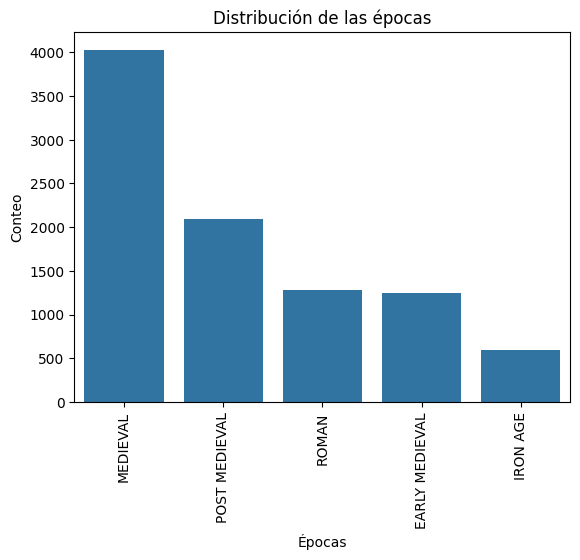

In [12]:
'''Visualizamos como queda la distribución por épocas después de los cambios.'''
 
sns.barplot(x=df_final['broadperiod'].value_counts().index, 
            y=df_final['broadperiod'].value_counts().values);
plt.xlabel('Épocas');
plt.ylabel('Conteo');
plt.title('Distribución de las épocas');
plt.xticks(rotation=90);

In [13]:
'''Reconvertir la variable Target en numérica, por haber estandarizado en dos periodos menos.'''

from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
convertidor = LabelEncoder()

# Aplicar la codificación a la columna 'broadperiod'
df_final['period'] = convertidor.fit_transform(df_final['broadperiod'])

# Verificar el resultado
df_final[['broadperiod', 'period']].head()

,broadperiod,period
0,ROMAN,4
1,ROMAN,4
2,ROMAN,4
3,ROMAN,4
4,POST MEDIEVAL,3


In [14]:
'''Ver la codificación.'''

df_final[['broadperiod', 'period']].value_counts()

broadperiod     period
MEDIEVAL        2         4025
POST MEDIEVAL   3         2091
ROMAN           4         1280
EARLY MEDIEVAL  0         1244
IRON AGE        1          600
Name: count, dtype: int64

### 3.2. Comprobar duplicados.

In [15]:
# Comprobar que no hay duplicados.

df_final['id'].duplicated().sum()

np.int64(0)

### 3.3. Eliminar columnas innecesarias.

In [16]:
'''Borrar columnas.'''

df_final = df_final.drop(columns= ['id', 'uri', 'secuid', 'objecttype', 'created', 'updated', 'institution', 'creator', 'discoveryMethod', 'finder',
                                'imagedir', 'thumbnail', 'currentLocation', 'subsequentActionTerm', 'gridSource','fourFigure', 'knownas',
                                'parish', 'filename', 'county', 'datefound1', 'datefound2', 'typeTerm', 'notes', 'reasonTerm', 'note',
                                'description', 'subperiodTo', 'periodFromName', 'todate', 'fromdate', 'TID', 'musaccno', 'smrRef', 'otherRef',
                                'quantity', 'objecttype', 'classification', 'subClassification', 'cciNumber', 'mintmark', 'geography',
                                'reeceID', 'periodToName','district','subperiodFrom'], axis = 1)

df_final

,Unique ID,objectCertainty,length,height,width,thickness,diameter,weight,broadperiod,cultureName,...,obverseLegend,reverseLegend,reverseType,regionName,period,URL,Primary material,Manufacture method,Image URL,Saved Image
0,BH-638D06,NaN,NaN,NaN,NaN,NaN,17.9,2.36,ROMAN,NaN,...,DN IVLIAN-VS[...],VOTIS V MVLTIS X,NaN,NaN,4,https://finds.org.uk/database/artefacts/record...,Silver,Struck or hammered,https://finds.org.uk/images/mfittock/medium/BH...,Fotos_monedas\BH-638D06.jpg
1,BH-4EEEC1,NaN,NaN,NaN,NaN,NaN,15.1,1.61,ROMAN,NaN,...,CONSTAN - (S P F AVG),VICT[O]RIAE DD AVG[G]Q NN,NaN,NaN,4,https://finds.org.uk/database/artefacts/record...,Copper alloy,Struck or hammered,https://finds.org.uk/images/mfittock/medium/BH...,Fotos_monedas\BH-4EEEC1.jpg
2,PUBLIC-E97499,NaN,NaN,NaN,NaN,NaN,19.0,2.92,ROMAN,NaN,...,CONSTANTINVS IVN NOB C,BEATA TRAN-QVILLITAS,NaN,NaN,4,https://finds.org.uk/database/artefacts/record...,Copper alloy,Struck or hammered,https://finds.org.uk/images/strebor/medium/PUB...,Fotos_monedas\PUBLIC-E97499.jpg
3,PUBLIC-C94E4B,NaN,NaN,NaN,NaN,NaN,18.5,1.43,ROMAN,NaN,...,GAL[LIENV]S [AVG],APOLLIN[I CONS AVG],NaN,NaN,4,https://finds.org.uk/database/artefacts/record...,Copper alloy,Struck or hammered,https://finds.org.uk/images/strebor/medium/PUB...,Fotos_monedas\PUBLIC-C94E4B.jpg
4,BH-7A498C,NaN,NaN,NaN,NaN,NaN,21.9,2.16,POST MEDIEVAL,NaN,...,[...]O[...]A ET [...]AR[...],HISPAN[...]GES : SI[...],NaN,NaN,3,https://finds.org.uk/database/artefacts/record...,Copper alloy,Struck or hammered,https://finds.org.uk/images/sashamarie/medium/...,Fotos_monedas\BH-7A498C.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9236,NLM1288,Certain,NaN,NaN,NaN,NaN,NaN,NaN,POST MEDIEVAL,NaN,...,NaN,HANNS ( )WINKEL IN NV,NaN,Yorkshire and the Humber,3,https://finds.org.uk/database/artefacts/record...,Copper alloy,NaN,https://finds.org.uk/images/kadams/medium/nlm1...,Fotos_monedas\NLM1288.jpg
9237,LVPL427,Certain,NaN,NaN,NaN,NaN,NaN,2.65,POST MEDIEVAL,NaN,...,NaN,NaN,NaN,North West,3,https://finds.org.uk/database/artefacts/record...,Silver,NaN,https://finds.org.uk/images/nherepath/medium/l...,Fotos_monedas\LVPL427.jpg
9238,LVPL410,Certain,NaN,NaN,NaN,NaN,NaN,2.80,POST MEDIEVAL,NaN,...,NaN,NaN,NaN,North West,3,https://finds.org.uk/database/artefacts/record...,Silver,NaN,https://finds.org.uk/images/nherepath/medium/l...,Fotos_monedas\LVPL410.jpg
9239,KENT453,Certain,NaN,NaN,NaN,NaN,10.5,NaN,POST MEDIEVAL,NaN,...,CAROLVS D G MA BR FR ET HI REX,CHRISTO AVSPICE REGNO,NaN,London,3,https://finds.org.uk/database/artefacts/record...,Silver,Struck or hammered,https://finds.org.uk/images/arichardson/medium...,Fotos_monedas\KENT453.jpg


### 3.4. Balancear el DataFrame.

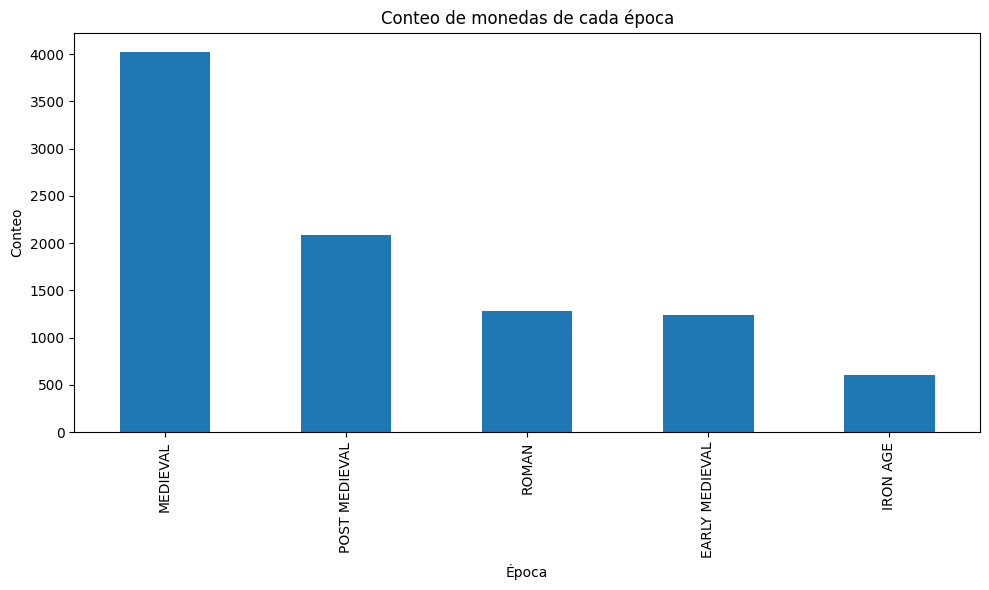

In [17]:
'''Visualización de la distribución de las monedas por épocas.'''

# Obtener los conteos de subperiodFrom por broadperiod
cantidad_periodos = df_final['broadperiod'].value_counts()

# Crear el gráfico
cantidad_periodos.plot(kind='bar', figsize=(10,6))

# Etiquetas y título
plt.title('Conteo de monedas de cada época')
plt.xlabel('Época')
plt.ylabel('Conteo')

# Mostrar el gráfico
plt.xticks(rotation=90)  
plt.tight_layout()  

In [18]:
'''Al haber muchos nulls y además de la época medieval hay bastantes monedas, voy a balancear el dataset y a la vez bajar el % de nulls.'''

# Paso 1: Separar las clases
df_medieval = df_final[df_final['broadperiod'] == 'MEDIEVAL']
df_post_medieval = df_final[df_final['broadperiod'] == 'POST MEDIEVAL']

# Paso 2: Obtener el tamaño de la clase menor (POST MEDIEVAL)
min_class_len = len(df_post_medieval)  # Tamaño de la clase menor

# Paso 3: Tomar una muestra aleatoria de la clase mayoritaria (MEDIEVAL) para que tenga el mismo tamaño que la clase menor
df_medieval_balanced = df_medieval.sample(n=min_class_len, random_state=7)

# Paso 4: Concatenar las clases balanceadas
df_balanceado = pd.concat([
    df_medieval_balanced,
    df_post_medieval,
])

# Verificar el tamaño del dataframe balanceado
print(f"Total de registros en el DataFrame balanceado: {len(df_balanceado)}")
print(df_balanceado['broadperiod'].value_counts())

Total de registros en el DataFrame balanceado: 4182
broadperiod
MEDIEVAL         2091
POST MEDIEVAL    2091
Name: count, dtype: int64


In [19]:
'''Borro del dataset inicial las monedas medievales y postmedievales para evitar duplicados cuando de unifique la parte balanceada con la original.'''

#  Borro del dataset las monedas que sean Medieval.

df_final = df_final.drop(df_final[df_final['broadperiod'] == 'MEDIEVAL'].index)

In [20]:
#  Borro del dataset las monedas que sean PostMedieval.

df_final = df_final.drop(df_final[df_final['broadperiod'] == 'POST MEDIEVAL'].index)

In [21]:
# Comprobar la eliminación de las monedas de esos dos periodos en el dataset inicial.

df_final['broadperiod'].value_counts()

broadperiod
ROMAN             1280
EARLY MEDIEVAL    1244
IRON AGE           600
Name: count, dtype: int64

In [22]:
'''Unificar los dos dataset, el balanceado y el final.'''

df_final_1 = pd.concat([df_balanceado, df_final])
df_final_1

,Unique ID,objectCertainty,length,height,width,thickness,diameter,weight,broadperiod,cultureName,...,obverseLegend,reverseLegend,reverseType,regionName,period,URL,Primary material,Manufacture method,Image URL,Saved Image
4550,LEIC-0434D6,Certain,NaN,NaN,NaN,0.25,15.0,0.64,MEDIEVAL,NaN,...,EDW,CIVITAS[EBORACI],NaN,East Midlands,2,https://finds.org.uk/database/artefacts/record...,Silver,Struck or hammered,https://finds.org.uk/images/wscott/medium/0434...,Fotos_monedas\LEIC-0434D6.png
3325,WAW-DC5BDB,NaN,NaN,NaN,NaN,NaN,15.8,0.56,MEDIEVAL,NaN,...,NaN,NaN,NaN,NaN,2,https://finds.org.uk/database/artefacts/record...,Silver,Struck or hammered,https://finds.org.uk/images/kaleahy/medium/Bir...,Fotos_monedas\WAW-DC5BDB.jpg
4830,IOW-095911,Certain,NaN,NaN,NaN,NaN,14.3,0.45,MEDIEVAL,NaN,...,Missing,Missing/illegible,NaN,South East,2,https://finds.org.uk/database/artefacts/record...,Silver,Struck or hammered,https://finds.org.uk/images/fbasford/medium/IO...,Fotos_monedas\IOW-095911.png
5903,NLM-D74164,Certain,NaN,NaN,NaN,NaN,16.8,0.36,MEDIEVAL,NaN,...,[HENRICVS REX III],illegible,NaN,Yorkshire and the Humber,2,https://finds.org.uk/database/artefacts/record...,Silver,Struck or hammered,https://finds.org.uk/images/lstaves/medium/NLM...,Fotos_monedas\NLM-D74164.jpg
5899,NLM-D87812,Certain,NaN,NaN,NaN,NaN,13.2,0.36,MEDIEVAL,NaN,...,illegible,illegible,NaN,North East,2,https://finds.org.uk/database/artefacts/record...,Silver,Struck or hammered,https://finds.org.uk/images/lstaves/medium/NLM...,Fotos_monedas\NLM-D87812.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,SF8970,NaN,NaN,NaN,NaN,2.00,18.0,4.31,ROMAN,NaN,...,NaN,[N]IKAE / ON,NaN,NaN,4,https://finds.org.uk/database/artefacts/record...,Copper alloy,NaN,https://finds.org.uk/images/fminter/medium/COG...,Fotos_monedas\SF8970.jpg
3210,WMID4942,Certain,NaN,NaN,NaN,NaN,NaN,3.99,ROMAN,NaN,...,M AYP CEV A[ ],KA / IE / Omega N,NaN,West Midlands,4,https://finds.org.uk/database/artefacts/record...,Copper alloy,Struck or hammered,https://finds.org.uk/images/abolton/medium/Wmi...,Fotos_monedas\WMID4942.jpg
3211,SF6727,Certain,NaN,NaN,NaN,NaN,17.0,3.03,ROMAN,NaN,...,TIMHN,TO? / A(?)O(?) / (?)AM-- / ?I(?)N,NaN,Eastern,4,https://finds.org.uk/database/artefacts/record...,Silver,NaN,https://finds.org.uk/images/hgeake/medium/sf67...,Fotos_monedas\SF6727.jpg
3212,LVPL1714,Certain,NaN,NaN,NaN,NaN,18.0,6.32,ROMAN,NaN,...,NaN,NaN,NaN,East Midlands,4,https://finds.org.uk/database/artefacts/record...,Copper alloy,NaN,https://finds.org.uk/images/nherepath/medium/l...,Fotos_monedas\LVPL1714.jpg


In [23]:
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7306 entries, 4550 to 3213
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unique ID           7306 non-null   object 
 1   objectCertainty     6356 non-null   object 
 2   length              259 non-null    float64
 3   height              2 non-null      float64
 4   width               253 non-null    float64
 5   thickness           2658 non-null   float64
 6   diameter            6097 non-null   float64
 7   weight              6567 non-null   float64
 8   broadperiod         7306 non-null   object 
 9   cultureName         457 non-null    object 
 10  inscription         9 non-null      object 
 11  rulerName           6093 non-null   object 
 12  mintName            4216 non-null   object 
 13  denominationName    6938 non-null   object 
 14  tribeName           509 non-null    object 
 15  categoryTerm        4646 non-null   object 
 16  axis    

In [24]:
'''Comprobar la eliminación de las monedas de esos dos periodos.'''

df_final_1['broadperiod'].value_counts()

broadperiod
MEDIEVAL          2091
POST MEDIEVAL     2091
ROMAN             1280
EARLY MEDIEVAL    1244
IRON AGE           600
Name: count, dtype: int64

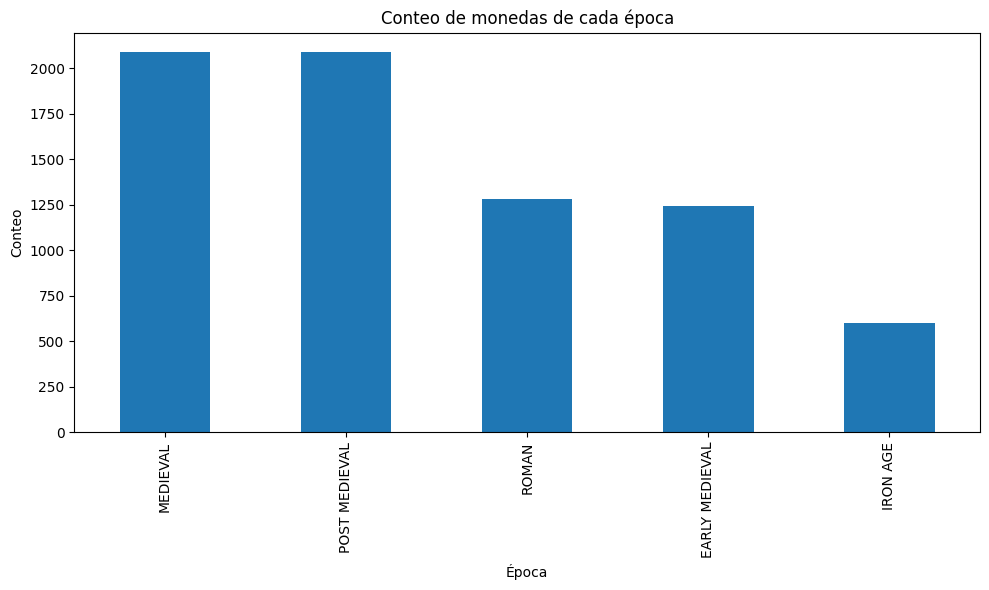

In [25]:
'''Visualización de la distribución de las monedas por épocas después del balanceo.'''

# Obtener los conteos de subperiodFrom por broadperiod
cantidad_periodos = df_final_1['broadperiod'].value_counts()

# Crear el gráfico
cantidad_periodos.plot(kind='bar', figsize=(10,6))

# Etiquetas y título
plt.title('Conteo de monedas de cada época')
plt.xlabel('Época')
plt.ylabel('Conteo')

# Mostrar el gráfico
plt.xticks(rotation=90)  
plt.tight_layout()  

### 3.5. Reordenar las columnas por orden de usabilidad.

In [26]:
# Definir el nuevo orden de las columnas
nuevo_orden = ['Unique ID', 'broadperiod', 'period', 'thickness', 'diameter', 'weight', 'axis', 'Primary material', 
                'Manufacture method', 'URL', 'Image URL', 'Saved Image','length', 
               'height', 'width', 'obverseDescription', 'reverseDescription', 'obverseLegend', 'reverseLegend', 'reverseType',
               'regionName', 'cultureName', 'inscription', 'objectCertainty', 
               'rulerName', 'mintName', 'denominationName', 'tribeName', 'categoryTerm', 'moneyerName']

# Reordenar el DataFrame
df_limpio = df_final_1[nuevo_orden]
df_limpio

,Unique ID,broadperiod,period,thickness,diameter,weight,axis,Primary material,Manufacture method,URL,...,regionName,cultureName,inscription,objectCertainty,rulerName,mintName,denominationName,tribeName,categoryTerm,moneyerName
4550,LEIC-0434D6,MEDIEVAL,2,0.25,15.0,0.64,NaN,Silver,Struck or hammered,https://finds.org.uk/database/artefacts/record...,...,East Midlands,NaN,NaN,Certain,Edward IV of England (first reign),NaN,Halfpenny,NaN,English coin Late Medieval 1377 - 1489,NaN
3325,WAW-DC5BDB,MEDIEVAL,2,NaN,15.8,0.56,NaN,Silver,Struck or hammered,https://finds.org.uk/database/artefacts/record...,...,NaN,NaN,NaN,NaN,Edward I - III,NaN,Halfpenny,NaN,English coin Edwardian type 1279 - 1377,NaN
4830,IOW-095911,MEDIEVAL,2,NaN,14.3,0.45,NaN,Silver,Struck or hammered,https://finds.org.uk/database/artefacts/record...,...,South East,NaN,NaN,Certain,Richard II of England,York,Penny,NaN,English coin Late Medieval 1377 - 1489,NaN
5903,NLM-D74164,MEDIEVAL,2,NaN,16.8,0.36,NaN,Silver,Struck or hammered,https://finds.org.uk/database/artefacts/record...,...,Yorkshire and the Humber,NaN,NaN,Certain,Henry III of England,NaN,Cut halfpenny,NaN,English coin short and long cross period 1180 ...,NaN
5899,NLM-D87812,MEDIEVAL,2,NaN,13.2,0.36,NaN,Silver,Struck or hammered,https://finds.org.uk/database/artefacts/record...,...,North East,NaN,NaN,Certain,NaN,NaN,Farthing,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,SF8970,ROMAN,4,2.00,18.0,4.31,NaN,Copper alloy,NaN,https://finds.org.uk/database/artefacts/record...,...,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,NaN,NaN,NaN
3210,WMID4942,ROMAN,4,NaN,NaN,3.99,NaN,Copper alloy,Struck or hammered,https://finds.org.uk/database/artefacts/record...,...,West Midlands,NaN,NaN,Certain,Severus Alexander,"Nicaea, Bithynia",Uncertain,NaN,NaN,NaN
3211,SF6727,ROMAN,4,NaN,17.0,3.03,NaN,Silver,NaN,https://finds.org.uk/database/artefacts/record...,...,Eastern,NaN,NaN,Certain,NaN,NaN,NaN,NaN,NaN,NaN
3212,LVPL1714,ROMAN,4,NaN,18.0,6.32,NaN,Copper alloy,NaN,https://finds.org.uk/database/artefacts/record...,...,East Midlands,NaN,NaN,Certain,Philip II,NaN,NaN,NaN,NaN,NaN


In [27]:
'''Al renombrar el dataframe, realizo una copia para asegurar los futuros cambios.'''

df_limpio = df_limpio.copy()

### 3.6. Convertir columnas de categóricas a numéricas.

#### Columna de Materia Prima.

In [28]:
'''Convertir la columna Primary material en numérica.'''

from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
convertidor = LabelEncoder()

# Aplicar la codificación a la columna 'Primary material'
df_limpio.loc[:, 'Primary Material_n'] = convertidor.fit_transform(df_limpio['Primary material'])

# Verificar el resultado
df_limpio[['Primary material', 'Primary Material_n']].head()

,Primary material,Primary Material_n
4550,Silver,8
3325,Silver,8
4830,Silver,8
5903,Silver,8
5899,Silver,8


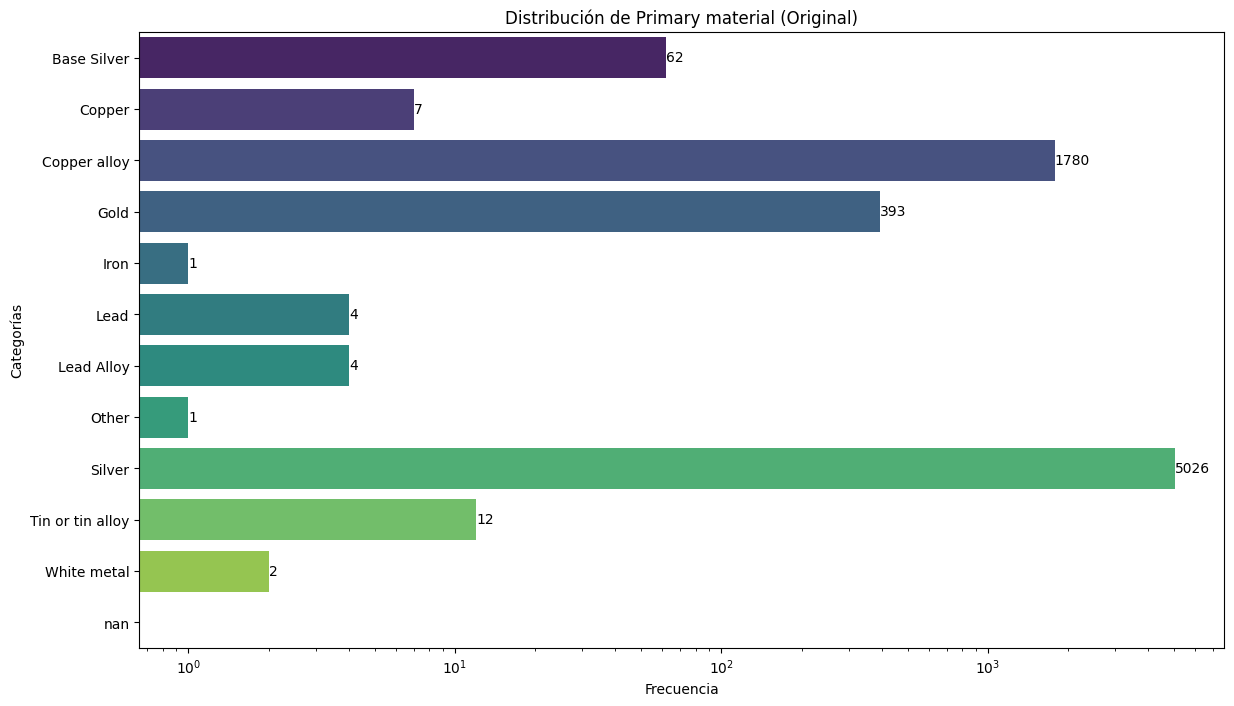

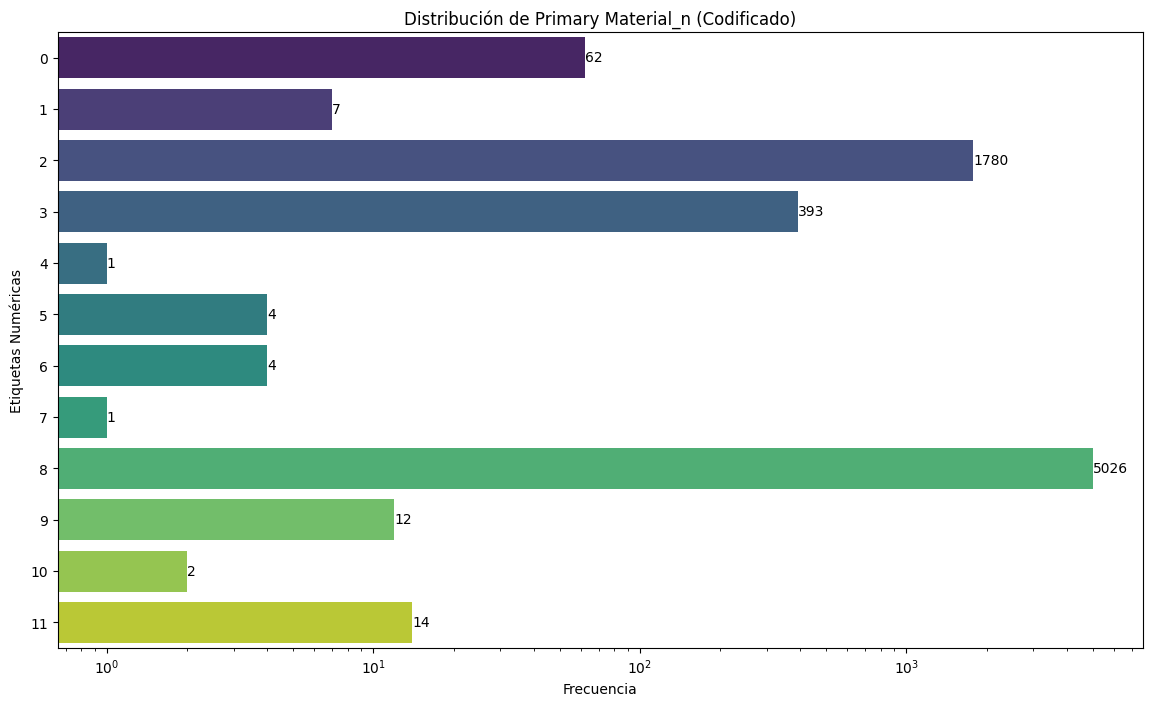

In [29]:
'''Visualización de la conversión.'''

# Obtener las categorías y sus códigos numéricos en el mismo orden
categorias = df_limpio[['Primary material', 'Primary Material_n']].drop_duplicates().sort_values('Primary Material_n')
orden_categorias = categorias['Primary material'].tolist()
orden_codigos = categorias['Primary Material_n'].tolist()

# Crear una paleta de colores consistente
paleta_colores = sns.color_palette('viridis', len(orden_categorias))

# Crear un diccionario para mapear cada categoría con un color específico
colores_mapeados = dict(zip(orden_categorias, paleta_colores))
colores_codificados = dict(zip(orden_codigos, paleta_colores))

# --- Gráfico para Categorías Originales ---
plt.figure(figsize=(14, 8))
grafico_original = sns.countplot(
    y='Primary material', 
    data=df_limpio, 
    order=orden_categorias, 
    palette=colores_mapeados, 
    hue='Primary material', 
    legend=False
)
plt.title('Distribución de Primary material (Original)')
plt.xlabel('Frecuencia')
plt.ylabel('Categorías')
plt.xscale('log')  # Escala logarítmica para ver mejor las frecuencias pequeñas

# Agregar etiquetas de cantidad al final de cada barra
for container in grafico_original.containers:
    grafico_original.bar_label(container, label_type='edge')



# --- Gráfico para Categorías Codificadas ---
plt.figure(figsize=(14, 8))
grafico_codificado = sns.countplot(
    y='Primary Material_n', 
    data=df_limpio, 
    order=orden_codigos, 
    palette=colores_codificados, 
    hue='Primary Material_n', 
    legend=False
)
plt.title('Distribución de Primary Material_n (Codificado)')
plt.xlabel('Frecuencia')
plt.ylabel('Etiquetas Numéricas')
plt.xscale('log')  # Escala logarítmica para ver mejor las frecuencias pequeñas

# Agregar etiquetas de cantidad al final de cada barra
for container in grafico_codificado.containers:
    grafico_codificado.bar_label(container, label_type='edge')

#### Columna Método de fabricación.

In [30]:
'''Convertir la columna Manufacture method en numérica.'''

from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
convertidor = LabelEncoder()

# Aplicar la codificación a la columna 'Manufacture method'
df_limpio.loc[:, 'Manufacture Method_n'] = convertidor.fit_transform(df_limpio['Manufacture method'])

# Verificar el resultado
df_limpio[['Manufacture method', 'Manufacture Method_n']].head()

,Manufacture method,Manufacture Method_n
4550,Struck or hammered,4
3325,Struck or hammered,4
4830,Struck or hammered,4
5903,Struck or hammered,4
5899,Struck or hammered,4


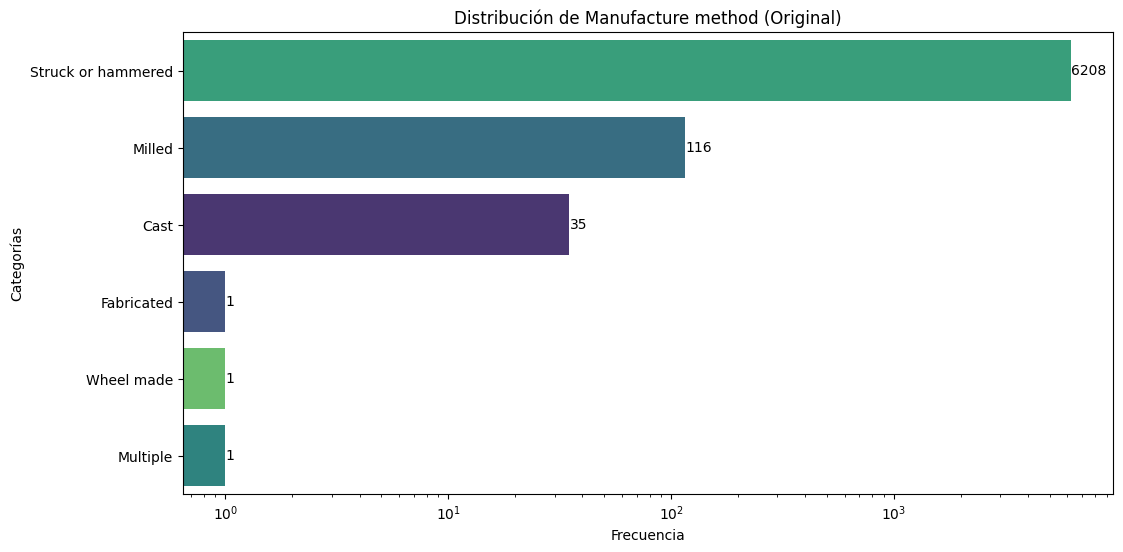

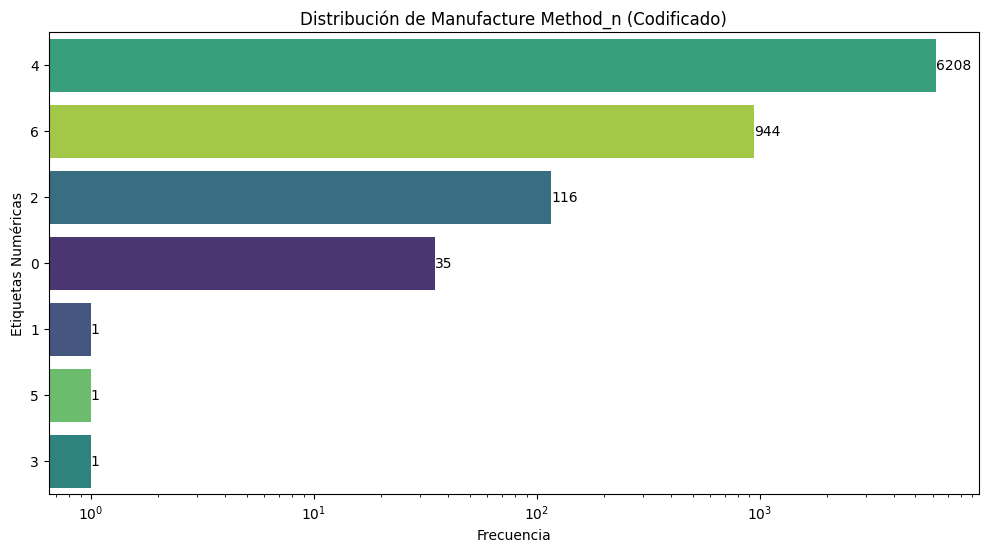

In [31]:
'''Visualización de la conversión.'''

# Obtener las categorías y sus códigos numéricos en el mismo orden
categorias = df_limpio[['Manufacture method', 'Manufacture Method_n']].drop_duplicates().sort_values('Manufacture Method_n')
orden_categorias = categorias['Manufacture method'].tolist()
orden_codigos = categorias['Manufacture Method_n'].tolist()

# Crear una paleta de colores consistente
paleta_colores = sns.color_palette('viridis', len(orden_categorias))

# Crear un diccionario para mapear cada categoría con un color específico
colores_mapeados = dict(zip(orden_categorias, paleta_colores))
colores_codificados = dict(zip(orden_codigos, paleta_colores))

# --- Gráfico para Categorías Originales ---
plt.figure(figsize=(12, 6))
grafico_original = sns.countplot(
    y='Manufacture method', 
    data=df_limpio, 
    order=df_limpio['Manufacture method'].value_counts().index, 
    palette=colores_mapeados, 
    hue='Manufacture method', 
    legend=False
)
plt.title('Distribución de Manufacture method (Original)')
plt.xlabel('Frecuencia')
plt.ylabel('Categorías')
plt.xscale('log')  # Escala logarítmica para ver mejor las frecuencias pequeñas

# Agregar etiquetas de cantidad al final de cada barra
for container in grafico_original.containers:
    grafico_original.bar_label(container, label_type='edge')


# --- Gráfico para Categorías Codificadas ---
plt.figure(figsize=(12, 6))
grafico_codificado = sns.countplot(
    y='Manufacture Method_n', 
    data=df_limpio, 
    order=df_limpio['Manufacture Method_n'].value_counts().index, 
    palette=colores_codificados, 
    hue='Manufacture Method_n', 
    legend=False
)
plt.title('Distribución de Manufacture Method_n (Codificado)')
plt.xlabel('Frecuencia')
plt.ylabel('Etiquetas Numéricas')
plt.xscale('log')  # Escala logarítmica para ver mejor las frecuencias pequeñas

# Agregar etiquetas de cantidad al final de cada barra
for container in grafico_codificado.containers:
    grafico_codificado.bar_label(container, label_type='edge')

### 3.7. Tratamiento de los nulos.

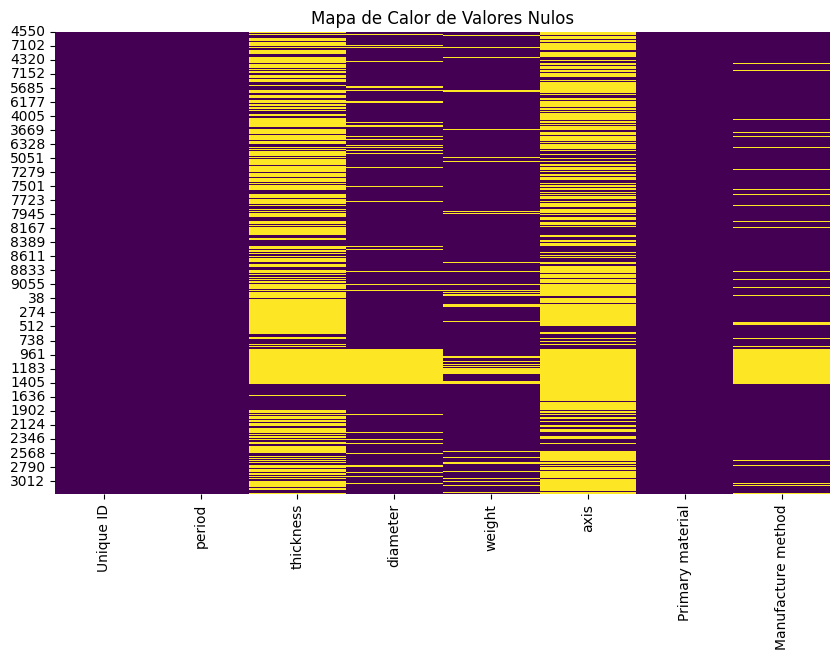

In [32]:
# Mapa de calor de nulos
plt.figure(figsize=(10,6));
sns.heatmap(df_limpio[['Unique ID', 'period','thickness', 'diameter', 'weight', 'axis', 'Primary material', 'Manufacture method']].isnull(), cbar=False, cmap='viridis');
plt.title('Mapa de Calor de Valores Nulos');

#### Columna Axis.

In [33]:
'''Convertir los Nan de la columna en valor -1 (fuera de rango) y a la vez una columna para indicar si es un dato conocido o desconocido.'''

# Reemplazar los NaN en 'axis' con -1.
df_limpio['axis'] = df_limpio['axis'].fillna(-1)

# Crear la columna dummy indicando si 'axis' era conocido (1) o desconocido (0)
df_limpio.loc[:,'axis_known'] = (df_limpio['axis'] != -1).astype(int)

# Verificar los cambios
print(df_limpio[['axis', 'axis_known']].head(10))

      axis  axis_known
4550  -1.0           0
3325  -1.0           0
4830  -1.0           0
5903  -1.0           0
5899  -1.0           0
5520  -1.0           0
6496  11.0           1
3425  -1.0           0
4017  11.0           1
3735  -1.0           0


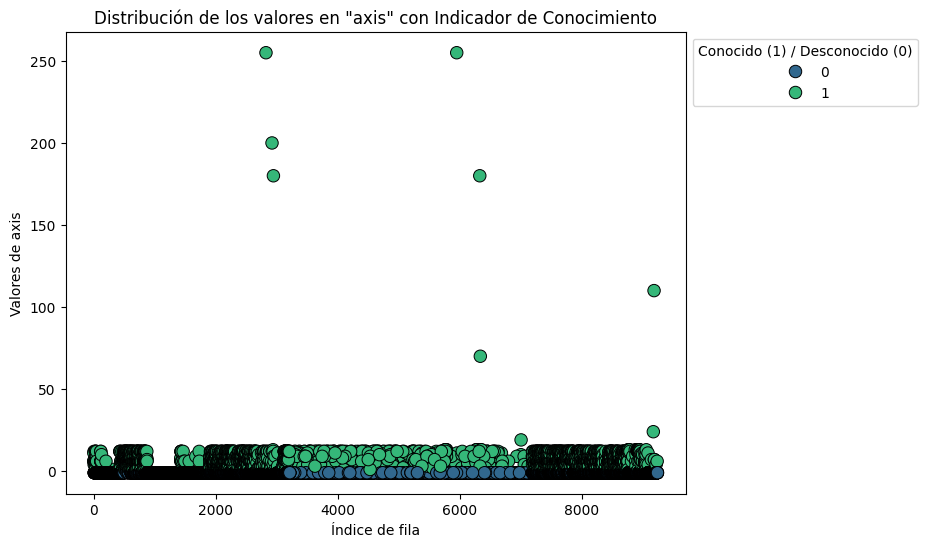

In [34]:
'''Visualización del tratamiento de los nulos en la columna axis.'''

# Graficar los valores de 'axis' y 'axis_known' usando un gráfico de dispersión
plt.figure(figsize=(8, 6));
sns.scatterplot(x=df_limpio.index, y='axis', data=df_limpio, hue='axis_known', palette='viridis', s=80, edgecolor='k');

# Títulos y etiquetas
plt.title('Distribución de los valores en "axis" con Indicador de Conocimiento');
plt.xlabel('Índice de fila');
plt.ylabel('Valores de axis');
plt.legend(title='Conocido (1) / Desconocido (0)', loc='upper left', bbox_to_anchor=(1, 1));

#### Columna Grosor.

In [35]:
'''Columna thickness'''

# Calcular la mediana, media y moda según su época.

print(df_limpio.groupby('broadperiod')['thickness'].transform('mean').round(2).value_counts())
print(df_limpio.groupby('broadperiod')['thickness'].transform(lambda x: x.mode()[0]).value_counts())
print(df_limpio.groupby('broadperiod')['thickness'].transform('median').round(2).value_counts())

thickness
0.83    4182
1.85    1280
1.35    1244
2.04     600
Name: count, dtype: int64
thickness
0.5    4182
1.5    1280
1.0    1244
1.1     600
Name: count, dtype: int64
thickness
0.60    2091
0.56    2091
1.70    1280
1.40    1244
2.00     600
Name: count, dtype: int64


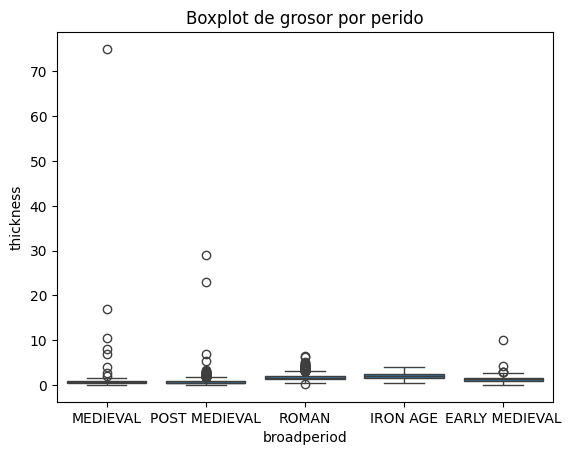

In [36]:
# Comprobar outliers para tomar una decisión en la imputación de los nulos.

# Boxplot agrupado por periodo
sns.boxplot(data=df_limpio, x='broadperiod', y='thickness');
plt.title('Boxplot de grosor por perido');

In [37]:
# Al comprobar que hay bastantes outliers tomo la decisión de sustituirlo por la mediana.

# Guardar la mediana de grosor por periodo.
mediana_grosor_por_epoca = df_limpio.groupby('broadperiod')['thickness'].transform('median')

# Imputar los nulos con la mediana de su periodo.
df_limpio['thickness'] = df_limpio['thickness'].fillna(mediana_grosor_por_epoca)

#### Columna Diámetro.

In [38]:
'''Columna diameter.'''

# Calcular la mediana, media y moda según su época.

print(df_limpio.groupby('broadperiod')['diameter'].transform('mean').round(2).value_counts())
print(df_limpio.groupby('broadperiod')['diameter'].transform(lambda x: x.mode()[0]).value_counts())
print(df_limpio.groupby('broadperiod')['diameter'].transform('median').round(2).value_counts())

diameter
17.80    2091
19.77    2091
18.96    1280
14.34    1244
14.91     600
Name: count, dtype: int64
diameter
18.0    2091
16.0    2091
12.0    1844
17.0    1280
Name: count, dtype: int64
diameter
18.00    2091
19.00    2091
18.20    1280
12.40    1244
14.75     600
Name: count, dtype: int64


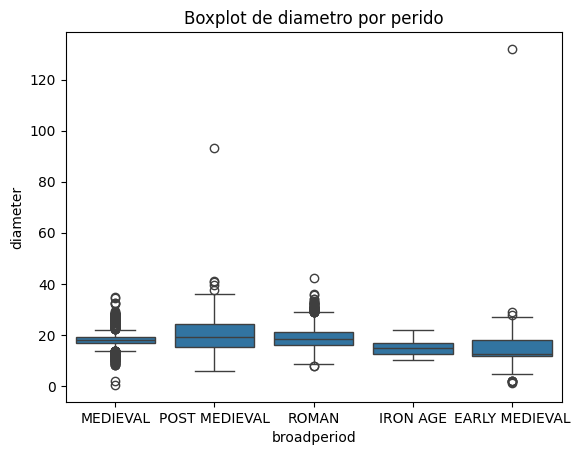

In [39]:
# Comprobar outliers para tomar una decisión en la imputación de los nulos.

# Boxplot agrupado por periodo
sns.boxplot(data=df_limpio, x='broadperiod', y='diameter');
plt.title('Boxplot de diametro por perido');

In [40]:
# Al comprobar que hay bastantes outliers tomo la decisión de sustituirlo por la mediana.

# Guardar la mediana de grosor por periodo.
mediana_diametro_por_epoca = df_limpio.groupby('broadperiod')['diameter'].transform('median')

# Imputar los nulos con la mediana de su periodo.
df_limpio['diameter'] = df_limpio['diameter'].fillna(mediana_diametro_por_epoca)

#### Columna Peso.

In [41]:
'''Columna weight.'''

# Calcular la mediana, media y moda según su época.

print(df_limpio.groupby('broadperiod')['weight'].transform('mean').round(2).value_counts())
print(df_limpio.groupby('broadperiod')['weight'].transform(lambda x: x.mode()[0]).value_counts())
print(df_limpio.groupby('broadperiod')['weight'].transform('median').round(2).value_counts())

weight
1.12    2091
2.25    2091
4.06    1280
1.05    1244
1.94     600
Name: count, dtype: int64
weight
1.3    2091
0.9    2091
1.2    1844
2.4    1280
Name: count, dtype: int64
weight
1.00    2091
1.21    2091
2.30    1280
1.06    1244
1.36     600
Name: count, dtype: int64


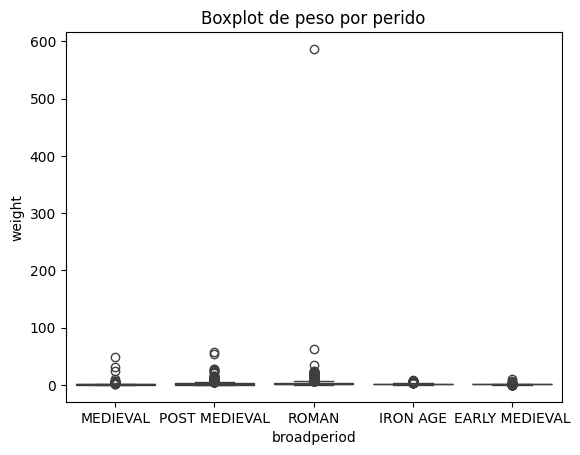

In [42]:
# Comprobar outliers para tomar una decisión en la imputación de los nulos.

# Boxplot agrupado por periodo
sns.boxplot(data=df_limpio, x='broadperiod', y='weight');
plt.title('Boxplot de peso por perido');

In [43]:
# Al comprobar que hay bastantes outliers tomo la decisión de sustituirlo por la mediana.

# Guardar la mediana de grosor por periodo.
mediana_peso_por_epoca = df_limpio.groupby('broadperiod')['weight'].transform('median')

# Imputar los nulos con la mediana de su periodo.
df_limpio['weight'] = df_limpio['weight'].fillna(mediana_peso_por_epoca)

### 3.8. Guardar el dataframe preparado para los modelos.

In [44]:
# Guardar el dataset limpio.

df_limpio.to_csv('../data/processed/df_limpio.csv', index=False)

## 4. GUARDAR LAS FOTOS DEL DATAFRAME EN UNA CARPETA LOCAL.

In [45]:
'''Importar bibliotecas.'''

import os
import shutil

In [49]:
'''Extraer las fotos correspondiente al dataframe y guardarlas en una carpeta.'''

# Ruta de la carpeta con las fotos y la carpeta de destino
carpeta_origen = '../data/img/Fotos_monedas'
carpeta_destino = '../data/img/img_monedas_DL'

# Cargar el DataFrame
df = pd.read_csv('../data/processed/df_limpio.csv')
ids_df = df['Unique ID'].astype(str).tolist()  # Convierte a str por si acaso

# Obtener las fotos en la carpeta de origen
fotos_carpeta = [f for f in os.listdir(carpeta_origen) if os.path.isfile(os.path.join(carpeta_origen, f))]
ids_carpeta = [os.path.splitext(f)[0] for f in fotos_carpeta]  # Quita la extensión

# Comparar y mover fotos coincidentes
for foto in fotos_carpeta:
    id_foto = os.path.splitext(foto)[0]  # ID sin extensión
    if id_foto in ids_df:
        ruta_origen = os.path.join(carpeta_origen, foto)
        ruta_destino = os.path.join(carpeta_destino, foto)
        shutil.move(ruta_origen, ruta_destino)
        print(f'Movida: {foto}') 

Movida: ASHM-082980.jpg
Movida: ASHM-5A190D.jpg
Movida: ASHM-5B51EE.jpg
Movida: ASHM-7C309E.jpg
Movida: ASHM-B1A8A5.jpg
Movida: ASHM-B37A71.jpg
Movida: ASHM-B402F1.jpg
Movida: ASHM-B5F8EC.jpg
Movida: ASHM-B75CAA.jpg
Movida: ASHM-B79F2A.jpg
Movida: ASHM-B8097E.jpg
Movida: ASHM-B84908.jpg
Movida: ASHM-B889D9.jpg
Movida: ASHM-DD3B67.jpg
Movida: ASHM-DD73A4.jpg
Movida: ASHM-DDF61A.jpg
Movida: ASHM-DE4178.jpg
Movida: ASHM-DE78ED.jpg
Movida: BERK-01EB24.jpg
Movida: BERK-03900A.png
Movida: BERK-04EBFC.jpg
Movida: BERK-05B4FC.jpg
Movida: BERK-05C5A1.jpg
Movida: BERK-0B2F72.jpg
Movida: BERK-112F63.jpg
Movida: BERK-1846B5.jpg
Movida: BERK-211B75.jpg
Movida: BERK-2126B3.jpg
Movida: BERK-220047.jpg
Movida: BERK-220523.jpg
Movida: BERK-2224B3.jpg
Movida: BERK-359737.jpg
Movida: BERK-381211.jpg
Movida: BERK-38240D.jpg
Movida: BERK-3B7E93.jpg
Movida: BERK-3F5432.jpg
Movida: BERK-421923.jpg
Movida: BERK-48940D.jpg
Movida: BERK-50EA8D.jpg
Movida: BERK-521056.jpg
Movida: BERK-5E3322.jpg
Movida: BERK-6A2

In [50]:
'''Distribución de las imágenes en cuanto a las épocas.'''

df_limpio.groupby('broadperiod')['Saved Image'].nunique()

broadperiod
EARLY MEDIEVAL    1230
IRON AGE           600
MEDIEVAL          2080
POST MEDIEVAL     2090
ROMAN             1280
Name: Saved Image, dtype: int64

In [52]:
'''Guardar y clasificar en carpetas las diferentes fotografías de monedas por época, para poder utilizarlas en modelos Deep Learning.'''

# Establecer el DataFrame
df = df_limpio

# Ruta de la carpeta con las imágenes
carpeta_imagenes = '../data/img/img_monedas_DL'

# Crear una lista de épocas (basada en broadperiod)
epocas = ['EARLY MEDIEVAL', 'IRON AGE', 'MEDIEVAL', 'POST MEDIEVAL', 'ROMAN']

# Crear carpetas para cada época si no existen
for epoca in epocas:
    ruta_carpeta = os.path.join(carpeta_imagenes, epoca)
    if not os.path.exists(ruta_carpeta):
        os.makedirs(ruta_carpeta)

# Recorrer cada imagen en el DataFrame
for index, row in df.iterrows():
    nombre_imagen = str(row['Saved Image'])  
    nombre_imagen = nombre_imagen.split('\\')[-1] 
    epoca = row['broadperiod']  

    # Verificar si la época es válida
    if epoca in epocas:
        # Verificar si la imagen existe en la carpeta origen
        ruta_origen = os.path.join(carpeta_imagenes, nombre_imagen)
        if os.path.exists(ruta_origen):
            # Definir la ruta de destino según la época
            ruta_destino = os.path.join(carpeta_imagenes, epoca, nombre_imagen)
            # Mover la imagen a su carpeta correspondiente
            shutil.move(ruta_origen, ruta_destino)
            print(f'Moviendo {nombre_imagen} a {epoca}')
        else:
            print(f'Imagen no encontrada: {nombre_imagen}')
    else:
        print(f'Época no válida para {nombre_imagen}: {epoca}')

Moviendo LEIC-0434D6.png a MEDIEVAL
Moviendo WAW-DC5BDB.jpg a MEDIEVAL
Moviendo IOW-095911.png a MEDIEVAL
Moviendo NLM-D74164.jpg a MEDIEVAL
Moviendo NLM-D87812.jpg a MEDIEVAL
Moviendo LEIC-E88023.png a MEDIEVAL
Moviendo WAW-8520A1.jpg a MEDIEVAL
Moviendo PUBLIC-2C6366.jpg a MEDIEVAL
Moviendo FAJN-19E425.jpg a MEDIEVAL
Moviendo BUC-BA79EE.png a MEDIEVAL
Moviendo PUBLIC-5930C8.jpg a MEDIEVAL
Moviendo IOW-6742F5.png a MEDIEVAL
Moviendo IOW-C1EF84.png a MEDIEVAL
Moviendo IOW-B4D566.png a MEDIEVAL
Moviendo IOW-C100F1.png a MEDIEVAL
Moviendo BERK-381211.jpg a MEDIEVAL
Moviendo LEIC-F43B14.png a MEDIEVAL
Moviendo LEIC-14F6A7.png a MEDIEVAL
Moviendo SUR-674167.png a MEDIEVAL
Moviendo LANCUM-BFCEF5.jpg a MEDIEVAL
Moviendo IOW-0F9F21.png a MEDIEVAL
Moviendo IOW-BB2EE6.png a MEDIEVAL
Moviendo LIN-4944F5.jpg a MEDIEVAL
Moviendo IOW-E6D146.png a MEDIEVAL
Moviendo LEIC-2F3D14.png a MEDIEVAL
Moviendo FAKL-6CC281.jpg a MEDIEVAL
Moviendo FAKL-81F65D.jpg a MEDIEVAL
Moviendo NLM-C206B2.jpg a MEDIEVAL
Mo